# 13.2 흉부 엑스선 기반 폐렴 진단 탐색적 데이터 분석
- [흉부 엑스선 기반 폐렴 진단 데이터셋 링크](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
- [탐색적 데이터 분석 코드 참고 링크](https://www.kaggle.com/dhruvmak/eda-with-bokeh-efficientnet-92)

## 13.2.1 데이터 둘러보기

In [1]:
# 데이터 경로
data_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/'

# 훈련, 검증, 테스트 데이터 경로 설정
train_path = data_path + 'train/'
valid_path = data_path + 'val/'
test_path = data_path + 'test/'

In [2]:
from glob import glob

print(f'훈련 데이터 개수 : {len(glob(train_path + "*/*"))}')
print(f'검증 데이터 개수 : {len(glob(valid_path + "*/*"))}')
print(f'테스트 데이터 개수 : {len(glob(test_path + "*/*"))}')

훈련 데이터 개수 : 5216
검증 데이터 개수 : 16
테스트 데이터 개수 : 624


 - 검증데이터가 16개로 적으니 검증 데이터 성능 점수를 지나치게 신뢰할 필요는 없다

In [3]:
all_normal_imgs = []    # 모든(훈련/검증/테스트) 정상 이미지를 담을 리스트 초기화
all_pneumonia_imgs = [] # 모든(훈련/검증/테스트) 폐렴 이미지를 담을 리스트 초기화

for cat in ['train/', 'val/', 'test/']:
    data_cat_path = data_path + cat
    # 정상, 폐렴 이미지 경로
    normal_imgs = glob(data_cat_path + 'NORMAL/*') # 리스트
    pneumonia_imgs = glob(data_cat_path + 'PNEUMONIA/*')
    # 정상, 폐렴 이미지 경로를 리스트에 추가
    all_normal_imgs.extend(normal_imgs) # append()와 달리 extend()는 리스트를 각 요소로 나누어 리스트에 넣을 수 있다.
    all_pneumonia_imgs.extend(pneumonia_imgs)

# print(all_normal_imgs)
print(f'정상 흉부 이미지 개수 : {len(all_normal_imgs)}')
print(f'폐렴 흉부 이미지 개수 : {len(all_pneumonia_imgs)}')

정상 흉부 이미지 개수 : 1583
폐렴 흉부 이미지 개수 : 4273


## 13.2.2 데이터 시각화

### 타깃값 분포

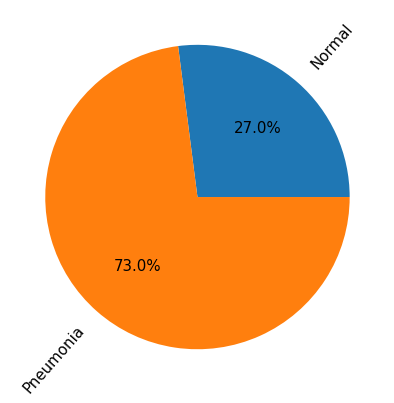

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))

label = ['Normal', 'Pneumonia'] # 타깃값 레이블
# 타깃값 분포 파이 그래프
plt.pie([len(all_normal_imgs), len(all_pneumonia_imgs)], 
        labels=label, 
        autopct='%.1f%%',
        rotatelabels=True);

### 이미지 출력

In [5]:
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_paths, rows=2, cols=3): 
    assert len(img_paths) <= rows*cols # 이미지가 행/열 개수보다 많으면 오류 발생
    
    mpl.rc('font', size=8)
    plt.figure(figsize=(15, 8)) 
    grid = gridspec.GridSpec(rows, cols) # 서브플롯 배치

    # 이미지 출력
    for idx, img_path in enumerate(img_paths):
        image = cv2.imread(img_path) # 이미지 파일 읽기
        ax = plt.subplot(grid[idx])
        ax.imshow(image) # 이미지 출력

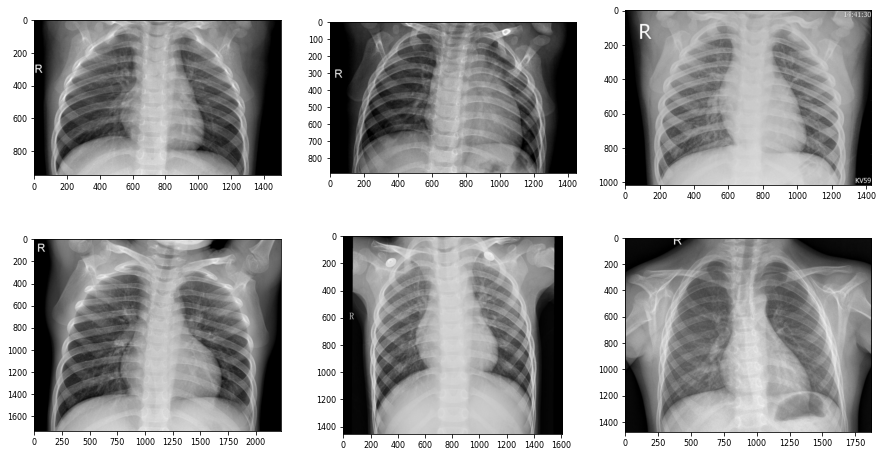

In [6]:
# 정상 엑스선 이미지 경로(마지막 6장)
num_of_imgs = 6
normal_img_paths = all_normal_imgs[-num_of_imgs:]

# 이미지 출력
show_image(normal_img_paths)

 - 이미지 가로, 세로 크기가 제각각임
 - 변환기를 활용해 이미지 크기 일치

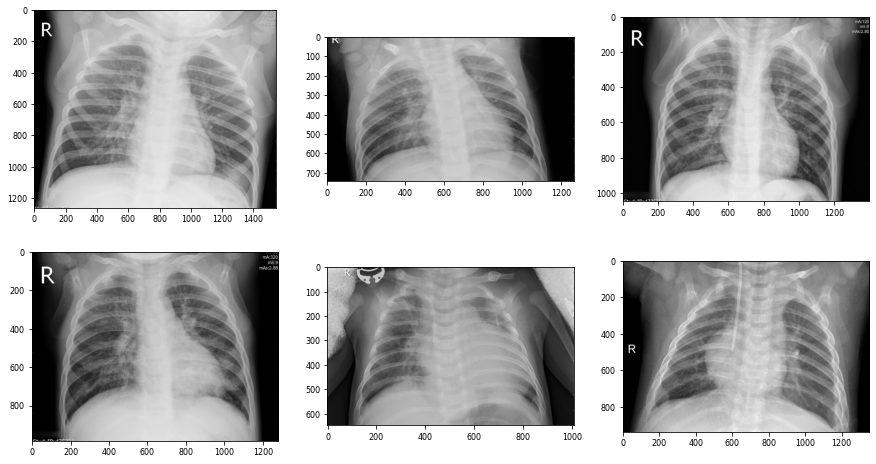

In [7]:
# 폐렴 엑스선 이미지 경로(마지막 6장)
pneumonia_img_paths = all_pneumonia_imgs[-num_of_imgs:]

# 이미지 출력
show_image(pneumonia_img_paths)